In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
# http://csharphelper.com/blog/2014/08/calculate-the-binomial-coefficient-n-choose-k-efficiently-in-c/

def binomial_coef(n, k):
    "Return the number of ways k successes can be arranged in n experiments"
    
    if k > n:
        raise ValueError
    
    res = 1;
    
    for i in range(1, k + 1):
        res *= n - (k - i)
        res /= i
        
    return res

In [4]:
binomial_coef(53, 17)

32308782859535.0

In [5]:
# binomial_coef(17, 53)

In [6]:
def binomial_probability(n, k, p):
    """
    Return the probability of getting k successes in n experiments. 
    P(success) = p
    """
    
    bc = binomial_coef(n, k)
    proba_per_comb = (p**k) * ((1 - p)**(n - k))
    
    return  bc * proba_per_comb

**Example problem 1**

What is the probability that 2 out of 5 newborns are girls? P(girls) = 0.49

In [7]:
P_girl = 0.49

In [8]:
binomial_probability(5, 2, P_girl)

0.31849505100000003

**Example problem 2**

What is the probability of unboxing a knife in 10 cases? P(knife) = 0.0026

In [9]:
P_knife = 0.0026

In [10]:
binomial_probability(10, 1, P_knife)

0.025397889123332764

That equates to 1 in 50.

What if we like wasting money and are extremely unlucky? What if we do not get a single knife in 3000 cases?
* https://youtu.be/-8Ks-tDziIY?t=152

In [11]:
binomial_probability(3000, 0, P_knife)

0.0004055941169535908

Now that is unlucky! 1 in 2500.

### Probability histogram

In [12]:
def plot_binomial_prob_histogram(n, p, y_scale_log = False):
    ks = list(range(n + 1))
    probs = [binomial_probability(n, k, p) for k in ks]
    
    plt.figure(figsize=(12, 8))
    plt.bar(ks, probs, width = 1, edgecolor='black')
    
    if y_scale_log:
        plt.yscale("log")

    plt.title(f"Probability histogram for the binomial with n={n}, p={p}")
    plt.xlabel("X")
    plt.ylabel("Probability")
    plt.show()

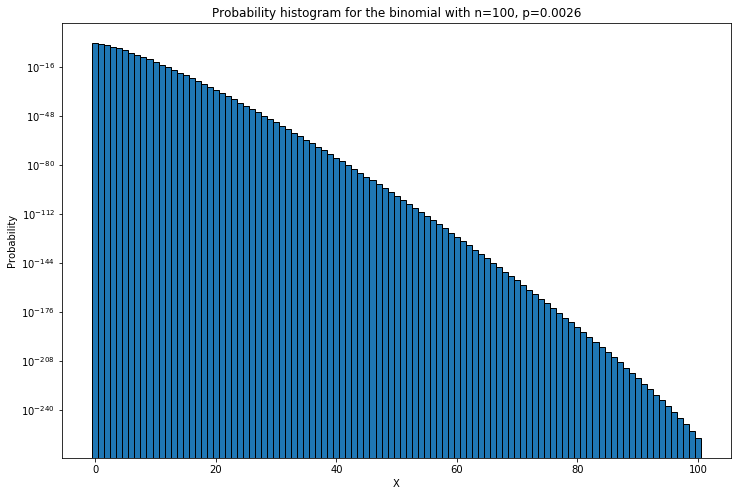

In [13]:
plot_binomial_prob_histogram(100, P_knife, y_scale_log = True)

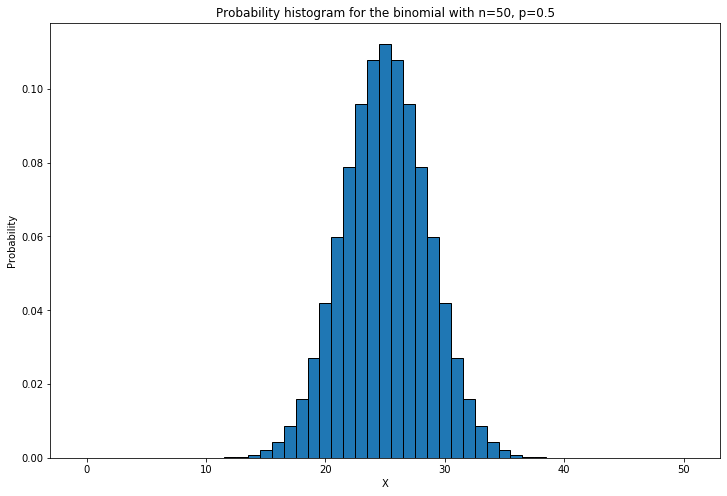

In [14]:
plot_binomial_prob_histogram(50, 0.5)

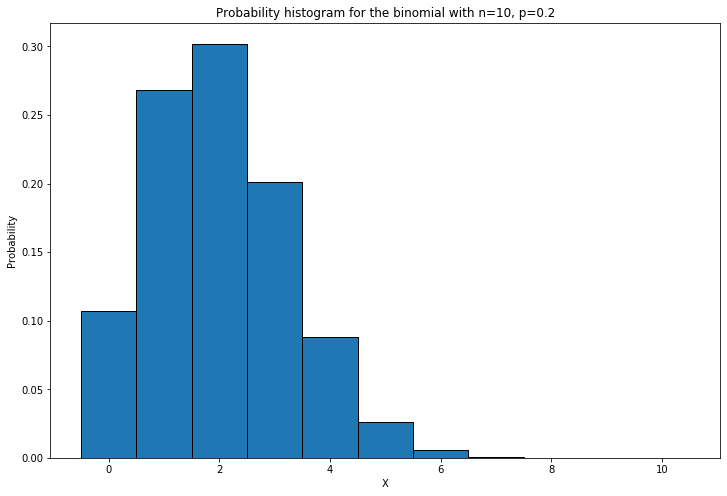

In [15]:
plot_binomial_prob_histogram(10, 0.2)